#Sinais Econômicos.


####Bibliotecas.

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
!pip install pandas_datareader
!pip install cufflinks
!pip install plotly
!pip install chart-studio==1.0.0

In [ ]:
import pandas_datareader.data as web
from scipy.stats import zscore
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import string

####Empresas na Bovespa.

In [ ]:
url = 'https://www.fundamentus.com.br/resultado.php'

In [ ]:
header = {
  "User-Agent": "Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [ ]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

In [ ]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

In [ ]:
df = df[df['Liq.2meses'] > 1000000]

In [ ]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,166)
# EV/EBIT #
ranking['EV/EBIT'] = df[ df['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:165].values
# ROIC #
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:165].values
##BOVA11 1 ano / "Adj Close"
ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  1 of 1 completed


In [ ]:
ebit = ranking.pivot_table(columns='EV/EBIT', values='pos')

In [ ]:
roic = ranking.pivot_table(columns='ROIC', values='pos')

In [ ]:
concat = pd.concat([ebit,roic])

In [ ]:
rank = concat.dropna(axis=1).sum()

In [ ]:
ticker = rank.sort_values()[:150]

In [ ]:
ticker.tail(20)

RAIL3    248.0
USIM3    249.0
SGPS3    249.0
SUZB3    249.0
VVAR3    250.0
BRDT3    250.0
GGBR3    254.0
CYRE3    255.0
LWSA3    257.0
GGBR4    259.0
HGTX3    263.0
BRPR3    265.0
BRKM5    278.0
POSI3    278.0
DTEX3    280.0
LOGG3    283.0
GFSA3    283.0
NTCO3    284.0
CAML3    284.0
MGLU3    289.0
dtype: float64

In [ ]:
tickers_ibov2 = "MGLU3.SA CAML3.SA NTCO3.SA GFSA3.SA LOGG3.SA DTEX3.SA POSI3.SA BRKM5.SA BRPR3.SA HGTX3.SA GGBR4.SA LWSA3.SA CYRE3.SA GGBR3.SA BRDT3.SA VVAR3.SA SUZB3.SA SGPS3.SA USIM3.SA RAIL3.SA"
dados2 = yf.download(tickers=tickers_ibov2, period='1y')["Adj Close"]

[*********************100%***********************]  20 of 20 completed


In [ ]:
dados2.dropna(how='all', inplace=True)
dados2.dropna(axis=1, inplace=True, thresh=246)

In [ ]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 8, 30)

####Índice Bovespa vs Dolar.

In [ ]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 8, 30)

In [ ]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2000-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira = carteira.dropna()
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2003-12-01,2.9230,20521.0
2003-12-02,2.9310,20458.0
2003-12-03,2.9310,20540.0
2003-12-04,2.9430,20414.0
2003-12-05,2.9340,20880.0
...,...,...
2020-08-25,5.6106,102118.0
2020-08-26,5.5074,100627.0
2020-08-27,5.6072,100624.0


In [ ]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2003-12-02,0.002737,-0.003070
2003-12-03,0.000000,0.004008
2003-12-04,0.004094,-0.006134
2003-12-05,-0.003058,0.022827
2003-12-08,0.002045,0.000431
...,...,...
2020-08-25,-0.001424,-0.001760
2020-08-26,-0.018394,-0.014601
2020-08-27,0.018121,-0.000030


####Taxa de desemprego nos Estados Unidos.

In [ ]:
desemprego = web.DataReader('UNRATE', 'fred', start)

In [ ]:
desemprego

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2020-03-01,4.4
2020-04-01,14.7
2020-05-01,13.3


####PIB nos Estados Unidos.

In [ ]:
gdp = web.DataReader('GDP', 'fred', start )

In [ ]:
gdp

,GDP
DATE,
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825
2000-10-01,10439.025
2001-01-01,10472.879
...,...
2019-04-01,21329.877
2019-07-01,21540.325
2019-10-01,21747.394


####Impressão de Dolares.

In [ ]:
m2 = web.DataReader('M2', 'fred', start)

In [ ]:
m2

,M2
DATE,
2000-01-03,4653.1
2000-01-10,4657.6
2000-01-17,4659.8
2000-01-24,4667.0
2000-01-31,4667.7
...,...
2020-07-20,18318.2
2020-07-27,18285.2
2020-08-03,18258.4


####Taxa de juros nos Estados Unidos.

In [ ]:
t3mo = web.DataReader('DGS3MO', 'fred', start)

In [ ]:
t10 = web.DataReader('DGS10', 'fred', start)

In [ ]:
t20 = web.DataReader('DGS20', 'fred', start)

In [ ]:
t30 = web.DataReader('DGS30', 'fred', start)

In [ ]:
taxa_juros = pd.concat([t3mo, t10, t20, t30], axis=1)

In [ ]:
taxa_juros

,DGS3MO,DGS10,DGS20,DGS30
DATE,,,,
2000-01-03,5.48,6.58,6.94,6.61
2000-01-04,5.43,6.49,6.84,6.53
2000-01-05,5.44,6.62,6.95,6.64
2000-01-06,5.41,6.57,6.86,6.58
2000-01-07,5.38,6.52,6.82,6.55
...,...,...,...,...
2020-08-24,0.12,0.65,1.14,1.35
2020-08-25,0.11,0.69,1.18,1.39
2020-08-26,0.11,0.69,1.20,1.41


##Gráficos

####Bolsas caras no Brasil e no mundo.

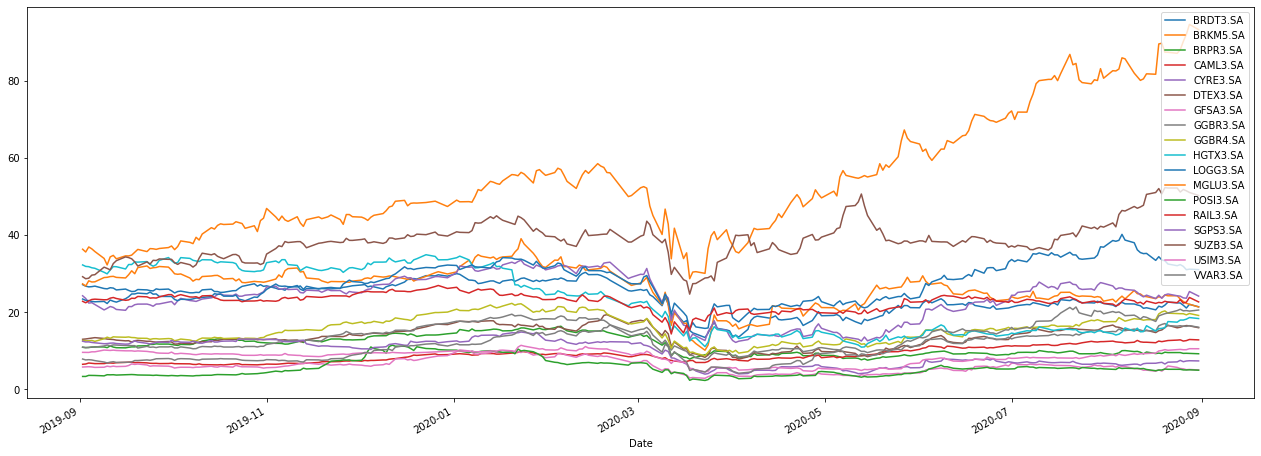

In [ ]:
dados2.plot(figsize=(22,8))

####Índice Bovespa vs Dolar. 
####Índice Bovespa e Dolar sobem juntos devido as incertezas políticas e a queda nas taxas de juros no Brasil.



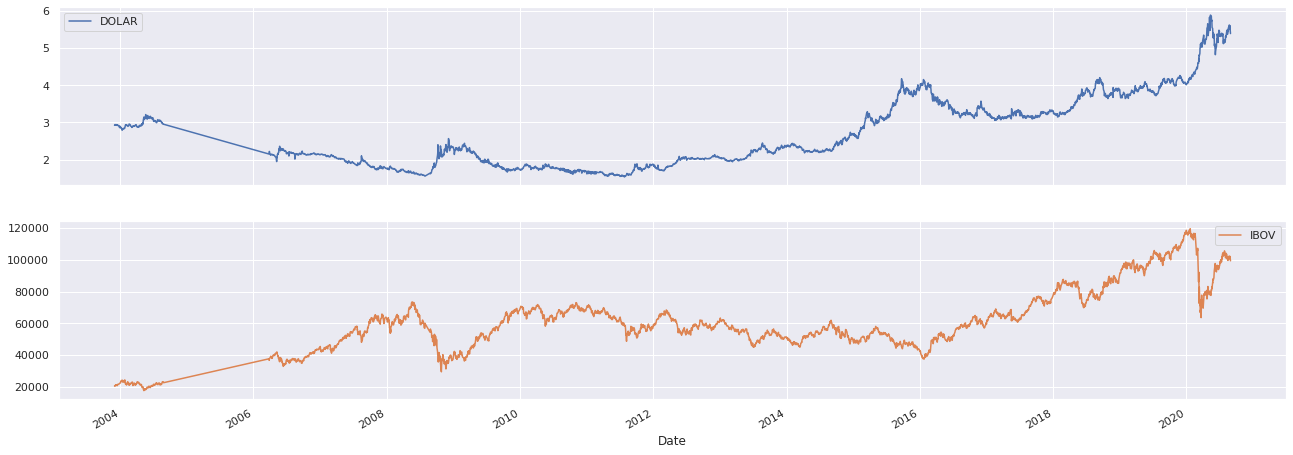

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

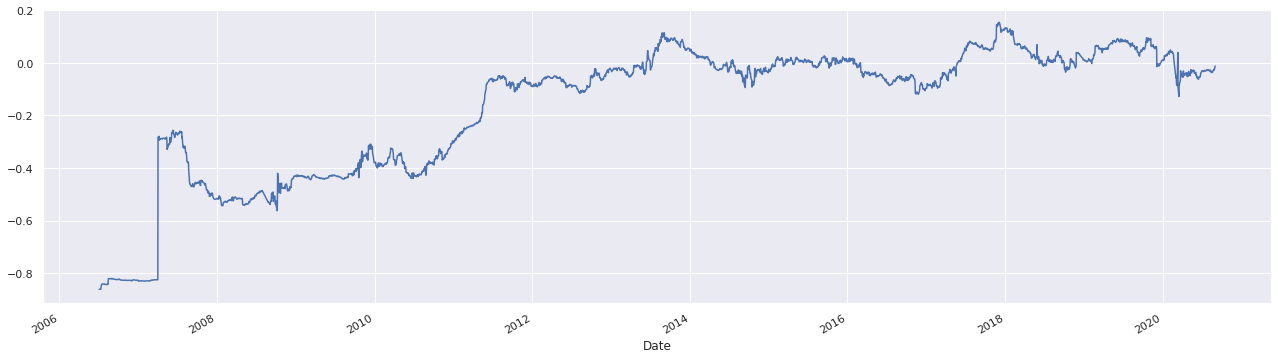

In [ ]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,6));

####Taxa de desemprego nos Estados Unidos.

In [ ]:
px.line(data_frame=desemprego, x=desemprego.index, y='UNRATE')

####PIB Estados Unidos.

In [ ]:
px.line(gdp, x=gdp.index, y='GDP')

####Impressão de Dolares.

In [ ]:
px.line(data_frame=m2, x=m2.index, y='M2')

####Taxa de juros nos Estados Unidos.
####Risco de inversão da curva de juros.

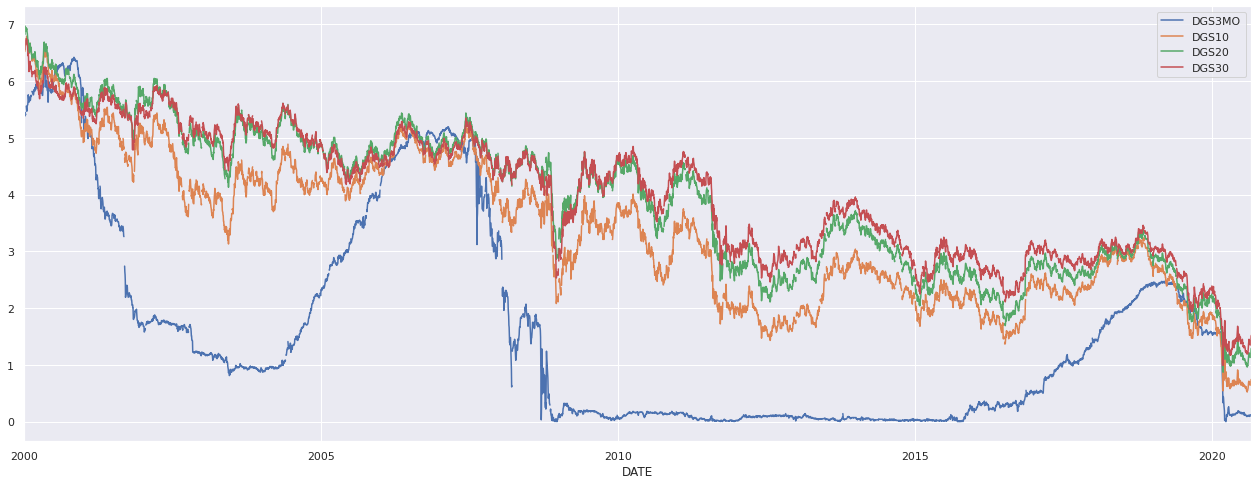

In [ ]:
taxa_juros.plot(figsize=(22,8))

####Trinta e quatro porcento dos economistas projetam recessão em 2021 nos Estados Unidos. 

Inversão da curva de juros nos Estados Unidos.

https://www.mises.org.br/article/2971/a-melhor-ferramenta-para-se-prever-uma-recessao-nos-eua-a-inversao-da-curva-de-juros
